In [1]:
import pandas as pd
from tsai.all import *
import numpy as np


/home/bsi/miniconda3/envs/ts/lib/python3.7/site-packages/torch/cuda/__init__.py:80: UserWarning: CUDA initialization: The NVIDIA driver on your system is too old (found version 9010). Please update your GPU driver by downloading and installing a new version from the URL: http://www.nvidia.com/Download/index.aspx Alternatively, go to: https://pytorch.org to install a PyTorch version that has been compiled with your version of the CUDA driver. (Triggered internally at  ../c10/cuda/CUDAFunctions.cpp:112.)
  return torch._C._cuda_getDeviceCount() > 0


In [2]:
df = pd.read_csv("../../data/non_constant_6000.csv")
# df = df[:100]
df["var_0"] = df.index.astype(float)
df["var_1"] = df.index.astype(float)
df["target"] = df.index.astype(float)
# df = df[["time_idx", "rabbitmq_connection_received_packets"]]
df = df[["var_0", "var_1", "target"]]


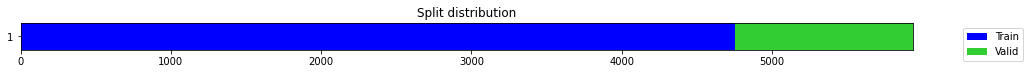

(#5940) [(TSTensor(vars:2, len:60, device=cpu), tensor(60.)), (TSTensor(vars:2, len:60, device=cpu), tensor(61.)), (TSTensor(vars:2, len:60, device=cpu), tensor(62.)), (TSTensor(vars:2, len:60, device=cpu), tensor(63.)), (TSTensor(vars:2, len:60, device=cpu), tensor(64.)), (TSTensor(vars:2, len:60, device=cpu), tensor(65.)), (TSTensor(vars:2, len:60, device=cpu), tensor(66.)), (TSTensor(vars:2, len:60, device=cpu), tensor(67.)), (TSTensor(vars:2, len:60, device=cpu), tensor(68.)), (TSTensor(vars:2, len:60, device=cpu), tensor(69.))] ...]

In [3]:
window_length = 60
stride = 1
horizon=1
X, y = SlidingWindow(window_length, horizon=horizon, get_x=["var_0","var_1"], get_y='target')(df)
tfms  = [None, TSRegression()]
splits = get_splits(y, valid_size=.2, stratify=True, random_state=23, shuffle=False)
dsets = TSDatasets(X, y, tfms=tfms, splits=splits, inplace=True)

dsets

In [6]:
tfms  = [None, [TSRegression()]]
batch_tfms = TSStandardize(by_var=True,by_sample=True)
dls = get_ts_dls(X, y, splits=splits, tfms=tfms, batch_tfms=batch_tfms, bs=64)
#%
get_regression_data
TSDatasets

(TSTensor(samples:64, vars:2, len:60, device=cpu),
 tensor([  73.,   92.,  129.,  225.,  247.,  406.,  477.,  547.,  775.,  940.,
          948., 1041., 1070., 1085., 1104., 1122., 1199., 1200., 1201., 1240.,
         1368., 1443., 1478., 1496., 1540., 1574., 1675., 1796., 1877., 1971.,
         2065., 2115., 2327., 2388., 2457., 2501., 2542., 2616., 2633., 2686.,
         2704., 2879., 2994., 3003., 3059., 3098., 3127., 3200., 3346., 3381.,
         3514., 3550., 3772., 3848., 4011., 4098., 4139., 4253., 4338., 4341.,
         4395., 4466., 4732., 4789.]))